In [1]:
#import pandas with alias pd
#import metrics
# import matplotlib
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
#Read SMSSpamCollection dataset
docs = pd.read_csv("/content/SMSSpamCollection.csv")



In [5]:
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# counting spam and ham instances
ham_spam= docs['Class'].value_counts()

#print ham_spam
print(ham_spam)

Class
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
#print percentage of spam messages in your dataset
print((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

13.406317300789663


/tmp/ipython-input-2274897472.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)


In [10]:
# mapping a column labels to ham as 0 and spam as 1
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

#print last 5 records of dataset
docs.tail()

,Class,sms,label
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [13]:
#Fetch all features
X= docs.sms

#Fetch label
y= docs.label

#print shape of X and y
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

# splitting into test and train with random state as 1 and test size as 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [35]:
X_train.shape


(1393,)

In [36]:
y_train.shape

(4179,)

In [37]:
X_test.shape

(1393,)

In [38]:
y_test.shape

(1393,)

In [15]:
# print X_train first 5 records
print(X_train[:5])

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object


In [16]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Instantiate CountVectorizer with stop_words
vect = CountVectorizer(stop_words='english')

# fit vect on your feature text (X_train)
vect.fit(X_train)


CountVectorizer(stop_words='english')

In [19]:
#check count of words in your features (Hint: Use vocabulary_ on CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer= CountVectorizer(stop_words='english')
Vectorizer.fit(X_train)
Vectorizer.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [22]:
#Check how feature names separately in form of words( Hint: Use get_feature_names_out function on  CountVectorizer)
Vectorizer.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

In [23]:
# transform feature data
X_train_transformed =  Vectorizer.transform(X_train)
X_test_tranformed = Vectorizer.transform(X_test)

In [24]:
#Now let's see how our X_train data looks like after tranformation ( hint: convert it into array and then print )
X_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# printing length of feature names
print(len(Vectorizer.get_feature_names_out()))

7204


In [26]:
# Print shape of X_train_transformed
print(X_train_transformed.shape)

(4179, 7204)


In [27]:
#Print X_train_transformed
print(X_train_transformed)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32467 stored elements and shape (4179, 7204)>
  Coords	Values
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [28]:
#Print feature names
print(Vectorizer.get_feature_names_out())

['00' '000' '008704050406' ... 'zyada' 'èn' '〨ud']


In [30]:
'''converting X_train_transformed matrix to dataframe (Hint:X_train_transformed
should be in an array form and columns as vector's feature name )'''
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(),columns=Vectorizer.get_feature_names_out())
X_train_transformed_df

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bernoulli Naive Bayes

In [69]:
#import BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit model on training dataset
bnb.fit(X_train_transformed,y_train)

# predict class of y
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba = bnb.predict_proba(X_test_tranformed)

# print accuracy score
BerNB_accuracy_score=(metrics.accuracy_score(y_test,y_pred_class))
print(BerNB_accuracy_score)

0.9770279971284996


In [39]:
# get confusion metrics
confusion = metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)

#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]


[[1207    1]
 [  31  154]]


In [42]:
# Calculate sensitivity using confusion metrics
sensitivity = TP/float(TP+FN)

#Print sensitivity
print(sensitivity)

0.8324324324324325


In [45]:
# Calculate specificity using confusion metrics
specificity = TN/float(TN+FP)

#Print specificity
print(specificity)

0.9991721854304636


In [46]:
# Calculate precision using confusion metrics
precision = TP/float(TP+FP)

#Print precision
print(precision)

0.9935483870967742


In [47]:
#import classification_report
from sklearn.metrics import classification_report

#Print  support, precision and recall
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [48]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve, auc


#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class)


#Calculate area under curve
roc_auc = auc(false_positive_rate, true_positive_rate)

#Print area under curve
print(roc_auc)

0.915802308931448


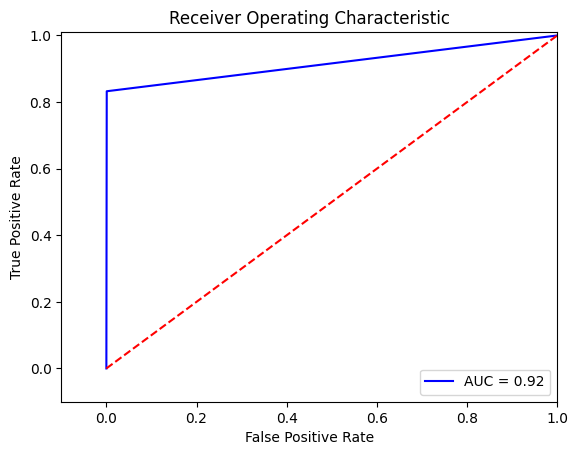

In [53]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Multinomial Naive Bayes

In [70]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# instantiate bernoulli NB object
mnb = MultinomialNB()

# fit model on training dataset
mnb.fit(X_train_transformed,y_train)

# predict class of y
y_pred_class = mnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba = mnb.predict_proba(X_test_tranformed)

# print accuracy score
MultiNB_accuracy_score=(metrics.accuracy_score(y_test,y_pred_class))
print(MultiNB_accuracy_score)



0.9877961234745154


In [57]:
# get confusion metrics
confusion = metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)

#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1201    7]
 [  10  175]]


In [58]:
#import classification_report
from sklearn.metrics import classification_report

#Print  support, precision and recall
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [59]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve, auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class)

#Calculate area under curve
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)


0.9700756219795956


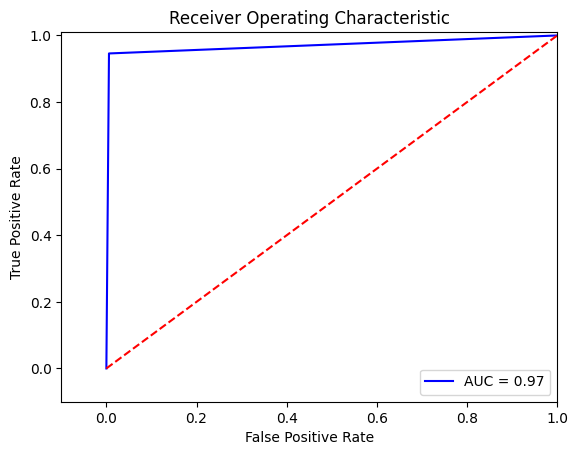

In [61]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gaussian Naive Bayes

In [71]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB


# instantiate bernoulli NB object
gnb = GaussianNB()

# fit model on training dataset
gnb.fit(X_train_transformed.toarray(),y_train)


# predict class of y
y_pred_class = gnb.predict(X_test_tranformed.toarray())

# predict probability on y
y_pred_proba = gnb.predict_proba(X_test_tranformed.toarray())

# print accuracy score
GauNB_accuracy_score=(metrics.accuracy_score(y_test,y_pred_class))
print(GauNB_accuracy_score)


0.8901651112706389


In [63]:
# get confusion metrics
confusion =  metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)


#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1066  142]
 [  11  174]]


In [64]:
#import classification_report
from sklearn.metrics import classification_report

#Print Precision, recall, f1-score and support
print(classification_report(y_test,y_pred_class))



              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1208
           1       0.55      0.94      0.69       185

    accuracy                           0.89      1393
   macro avg       0.77      0.91      0.81      1393
weighted avg       0.93      0.89      0.90      1393



In [65]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve, auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class)

#Calculate area under curve
roc_auc = auc(false_positive_rate, true_positive_rate)

#Print area under curve
print(roc_auc)



0.9114954358331843


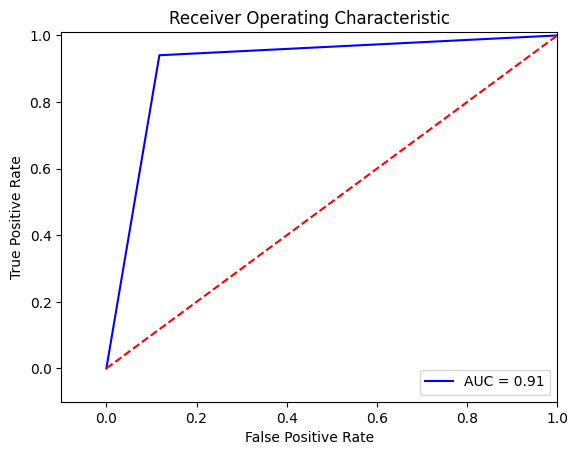

In [66]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [72]:
# print accuracy score of all three Naive Bayes algorithms.
print("BernoulliNB: ",BerNB_accuracy_score)
print("MultinomialNB: ",MultiNB_accuracy_score)
print("GaussianNB: ",GauNB_accuracy_score)


BernoulliNB:  0.9770279971284996
MultinomialNB:  0.9877961234745154
GaussianNB:  0.8901651112706389
